# **What Datasets are available?:**

There are a pletora of datasets available for financial crime analysis and research from vast amount of sources. The chosen dataset depends on the different categories of financial crime as describe by (Gottschalk, 2010).

1. Corruption
2. Fraud
3. Theft
4. Manipulation

# **What are the Data Sources?:**

Again, there are many sources for financial crime data depending on the type or category of financial crime.

**Data Sources**

1. Kaggle
2. World Bank Open data
3. AUSTRAC data
4. United Nations Office on Drug and Crime

# **Exploratory data analysis on collected data and our own synthetic dataset**

**Datasets:**

We have collected four financial dataset from Kaggle which consist of three synthetic datasets, one real anonymised and create our own synthetic financial data.

**1. Synthetc Financial Dataset**

The dataset is Synthetic datasets generated by the PaySim mobile money simulator. Source: Kaggle - https://www.kaggle.com/datasets/ealaxi/paysim1

**2. Fraud transaction Dataset**

The dataset consists of transactions made by considering simulated users through various terminals throughout the period from January 2023 to June 2023. Source: Kaggle https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection

**3. IBM Transactions for Anti Money Laundering (AML)dataset**

"Access to real financial transaction data is highly restricted -- for both proprietary and privacy reasons. Even when access is possible, it is problematic to provide a correct tag (laundering or legitimate) to each transaction -- as noted above. This synthetic transaction data from IBM avoids these problems."

"IBM release 6 datasets here divided into two groups of three:

Group HI has a relatively higher illicit ratio (more laundering).
Group LI has a relatively lower illicit ratio (less laundering).
Both HI and LI internally have three sets of data: small, medium, and large. The goal is to support a broad degree of modeling and computational resources. All of these datasets are independent, e.g. the small datasets are not a subset of the medium datasets. However, each of the six individual datasets can be subset chronologically for train, validate, and test. we have found a 60% / 20% / 20% division to be effective, and encourage others to follow this division.". Source: Kaggle - https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml


**4. Credit Card Fraud Detection Dataset 2023**

"This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions." Source: Kaggle - https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

**5. Our own synthetic credit card dataset**

We try to simulate a scenario a dataset used in a bank by a loan approval officer. We used **Faker Python packages** that generates fake data for us. We decided to make the number of rows 1000.

see Faker documentation: https://faker.readthedocs.io/en/master/


**Methodology:**

Exploratory Data Analysis (EDA): Understanding the data and Visualisation.

We will do exploratory data analysis on only one of the collect syntethic dataset and on our own created syntehic dataset.

**Limitation:**

Many financial crimes go **underreported**, business may hesistate to report financial crime to concerned to lose reputation or public trust. Public authority and Private entities find compiling comprehensive meaningful datasets **challenging**. The one of the main reason that comprehensive dataset on financial crime is unavailable is **privacy concerns** and **regulatory constraints**.

The second main reason is data fragmentation. This means data is fragmented across many institutions. **The fight against financial crime would greatly benefit from collaboration on data sharing among these institutions.**

We are fully aware that doing EDA on synthetic data will provide no interpretable meaningful insight. However, EDA and ETL are still important because we still need to understand the characteristics of the synthetic dataset in order create the models to fight against financial crime.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Synthetc Financial Dataset**

In [22]:
# Import dataset
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [21]:
#Columns names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
# Number of rows
len(df)

2587691

In [25]:
# First 10 rows including headings
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [26]:
# Check the number of fraudulent transactions
fraud_counts = df['isFraud'].value_counts()

# Check the number of types
type_counts = df['type'].value_counts()

In [27]:
# Number of fraudulent transactions
fraud_counts

0.0    2585380
1.0       2310
Name: isFraud, dtype: int64

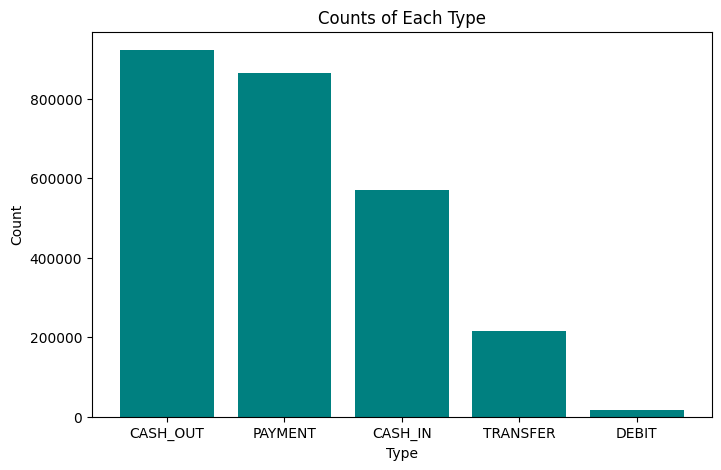

In [28]:
# Plotting the bar chart
plt.figure(figsize=(8,5))
plt.bar(type_counts.index, type_counts.values, color='teal')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts of Each Type')
plt.show()

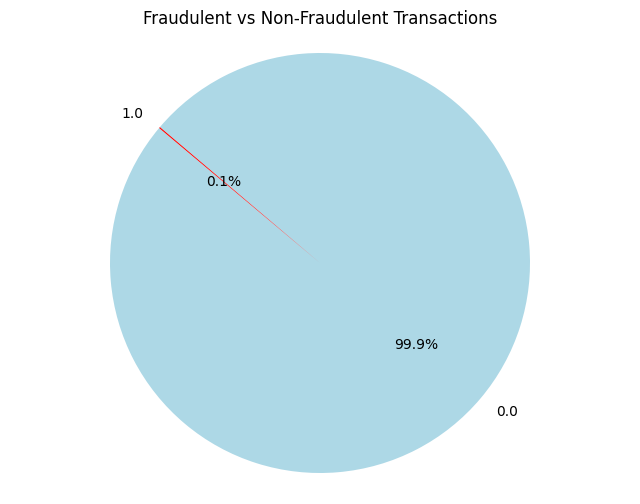

In [29]:
# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the figure
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


**Summary**

This synthetic data will allow us to create fraud detection models to fight financial crime. This is a dataset originally used in the paper "PaySim: A financial mobile money simulator for fraud detection". As we previously stated doing EDA is very important. For example, there is imbalance in the dataset as shown by the fraudulent transactions only constituting only 0.1% compared to non-fraudulent transaction being 99.9%. This imbalance is going to significant impact any classification model created.

The aim of any synthetic data is to emulate real world data. Therefore having fraudulent transaction being significantly less that non-fraudulent transaction makes sense.

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

**5. Our own financial dataset**

In [38]:
#First install the faker package
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:00


In [75]:
import numpy as np
import pandas as pd
from faker import Faker
from datetime import datetime, timedelta

def generate_synthetic_data():
    # Set seeds for reproducibility
    np.random.seed(42)
    fake = Faker()
    Faker.seed(42)

    # Number of rows in the dataset
    n_rows = 1000

    # Generate synthetic data
    data = {
        'Cardholder_Name': [fake.name() for _ in range(n_rows)],
        'Customer_ID': np.arange(1, n_rows + 1),
        'Age': np.random.randint(18, 100, n_rows),
        'Transaction_Date': [fake.date_between(start_date='-365d', end_date='today') for _ in range(n_rows)],
        'Transaction_Amount_AUD': np.random.uniform(1, 5000, n_rows),
        'Merchant_Name': [fake.company() for _ in range(n_rows)],
        'Credit_Score': np.random.randint(300, 850, n_rows),
        'Annual_Income': np.random.uniform(50000, 320000, n_rows),
        'Years_In_Current_Job': np.random.choice(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'], n_rows),
        'Home_Ownership': np.random.choice(['Rent', 'Own', 'Mortgage'], n_rows),
        'Monthly_Debt': np.random.uniform(100, 3000, n_rows),
        'Years_of_Credit_History': np.random.uniform(1, 30, n_rows),
        'Months_Since_Last_Delinquent': np.random.randint(0, 60, n_rows),
        'Number_of_Credit_Problems': np.random.randint(0, 5, n_rows),
        'Bankruptcies': np.random.randint(0, 2, n_rows),
        'IsFraud': np.random.choice([0, 1], n_rows, p=[0.98, 0.02]),
    }



    # Create a DataFrame from the generated data
    df = pd.DataFrame(data)
    return df


In [79]:
# Lets generate our own dataset
our_own_data = generate_synthetic_data()
our_own_data.head(5)

,Cardholder_Name,Customer_ID,Age,Transaction_Date,Transaction_Amount_AUD,Merchant_Name,Credit_Score,Annual_Income,Years_In_Current_Job,Home_Ownership,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Credit_Problems,Bankruptcies,IsFraud
0,Allison Hill,1,69,2023-05-29,4660.659294,Hansen-Webb,342,193008.125465,3 years,Mortgage,199.850795,25.256752,26,2,0,0
1,Noah Rhodes,2,32,2023-07-31,2826.100785,Lane-Schroeder,684,115311.189410,8 years,Own,1392.894094,15.846220,57,3,0,0
2,Angie Henderson,3,89,2023-01-04,3483.557469,Fitzgerald-Wyatt,734,185162.964212,4 years,Rent,2468.300205,16.283221,18,2,0,0
3,Daniel Wagner,4,78,2023-06-18,4612.574407,"Wilson, Hall and Logan",707,233497.489838,7 years,Rent,2667.192748,17.286241,23,0,1,0
4,Cristian Santos,5,38,2023-02-07,3536.485933,Garcia PLC,782,70584.588853,8 years,Rent,351.449046,5.953597,25,4,1,0


In [77]:
# Dataset information
our_own_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cardholder_Name               1000 non-null   object 
 1   Customer_ID                   1000 non-null   int64  
 2   Age                           1000 non-null   int64  
 3   Transaction_Date              1000 non-null   object 
 4   Transaction_Amount_AUD        1000 non-null   float64
 5   Merchant_Name                 1000 non-null   object 
 6   Credit_Score                  1000 non-null   int64  
 7   Annual_Income                 1000 non-null   float64
 8   Years_In_Current_Job          1000 non-null   object 
 9   Home_Ownership                1000 non-null   object 
 10  Monthly_Debt                  1000 non-null   float64
 11  Years_of_Credit_History       1000 non-null   float64
 12  Months_Since_Last_Delinquent  1000 non-null   int64  
 13  Numb

In [64]:
#Columns names
our_own_data.columns

Index(['Cardholder_Name', 'Customer_ID', 'Age', 'Transaction_Date',
       'Transaction_Amount_AUD', 'Merchant_Name', 'Credit_Score',
       'Annual_Income', 'Years_In_Current_Job', 'Home_Ownership',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_Since_Last_Delinquent', 'Number_of_Credit_Problems',
       'Bankruptcies', 'IsFraud'],
      dtype='object')

In [80]:
# Check the number of fraudulent transactions
fraud_trans = our_own_data['IsFraud'].value_counts()
fraud_trans

0    979
1     21
Name: IsFraud, dtype: int64

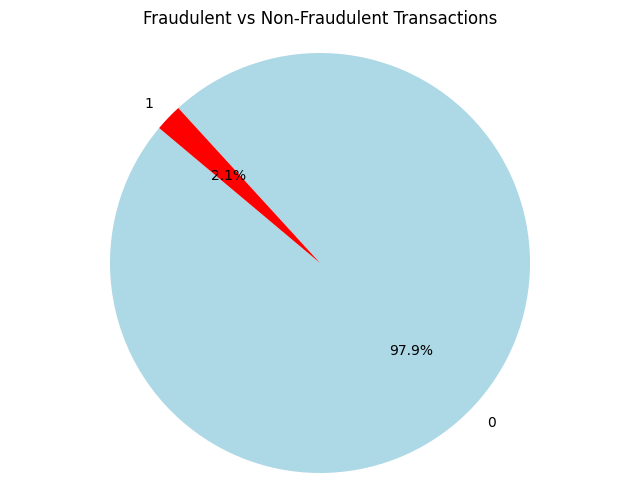

In [82]:
# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the figure
plt.pie(fraud_trans, labels=fraud_trans.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()